<a href="https://colab.research.google.com/github/Scodingcurriculum/Artificial-Intelligence-C56/blob/main/L19_(Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Original Text: I love this movie! It's fantastic and uplifting.
Tokens: ['I', 'love', 'this', 'movie', '!', 'It', "'s", 'fantastic', 'and', 'uplifting', '.']
Lemmas: ['I', 'love', 'this', 'movie', '!', 'it', 'be', 'fantastic', 'and', 'uplifting', '.']
Stop Words: ['love', 'movie', '!', 'fantastic', 'uplifting', '.']
--------------------------------------------------
Original Text: The plot was boring and predictable.
Tokens: ['The', 'plot', 'was', 'boring', 'and', 'predictable', '.']
Lemmas: ['the', 'plot', 'be', 'boring', 'and', 'predictable', '.']
Stop Words: ['plot', 'boring', 'predictable', '.']
--------------------------------------------------
Original Text: An average experience, not too good but not bad.
Tokens: ['An', 'average', 'experience', ',', 'not', 'too', 'good', 'but', 'not', 'bad', '.']
Lemmas: ['an', 'average', 'experience', ',', 'not', 'too', 'good', 'but', 'not', 'bad', '.']
Stop Words: ['average', 'experience', ',', 'good', 'bad', '.']
-----------------------------

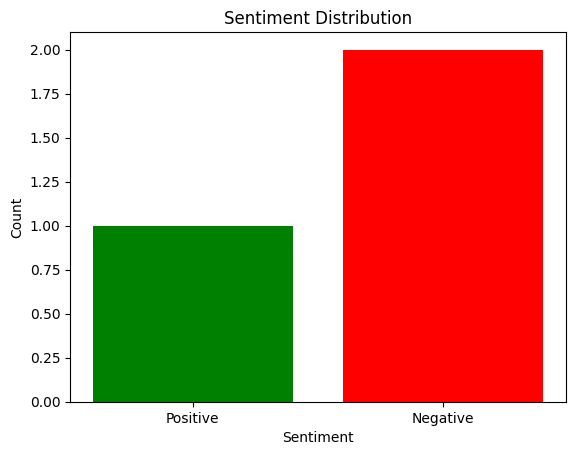

In [ ]:
# Import necessary libraries
import spacy
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample text data
text_data = [
    "I love this movie! It's fantastic and uplifting.",
    "The plot was boring and predictable.",
    "An average experience, not too good but not bad."
]

# Function to preprocess and analyze text
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    lemmas = [token.lemma_ for token in doc]
    stop_words = [token.text for token in doc if not token.is_stop]
    return tokens, lemmas, stop_words

# Process each text
for text in text_data:
    tokens, lemmas, stop_words = preprocess_text(text)
    print(f"Original Text: {text}")
    print("Tokens:", tokens)
    print("Lemmas:", lemmas)
    print("Stop Words:", stop_words)
    print("-" * 50)

# Simple sentiment classification based on keywords
positive_words = ['love', 'fantastic', 'uplifting', 'good', 'great', 'amazing']
negative_words = ['boring', 'predictable', 'average', 'bad', 'hate']

def classify_sentiment(text):
    positive_count = sum(1 for word in positive_words if word in text.lower())
    negative_count = sum(1 for word in negative_words if word in text.lower())
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

# Classify the sentiment of each text and store results
sentiments = [classify_sentiment(text) for text in text_data]
for text, sentiment in zip(text_data, sentiments):
    print(f"Sentiment of '{text}': {sentiment}")

# Visualization of sentiment distribution
sentiment_counts = {s: sentiments.count(s) for s in set(sentiments)}

plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
